## 1. 데이터 읽기

In [232]:
import pandas as pd

In [233]:
# conda install -y pandas

In [234]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")

In [235]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [236]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [237]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [238]:
CCTV_Seoul.columns[0]

'기관명'

In [239]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)

In [240]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [241]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N"
)

In [242]:
pop_Seoul.head()

,동별(2),소계.1,소계.2,소계.3,소계.5
0,소계,9619861,9366283,253578,1785286
1,종로구,150204,139189,11015,29338
2,중구,131800,121475,10325,26516
3,용산구,219451,206061,13390,39021
4,성동구,283853,276597,7256,50534


In [243]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자",
    },
    inplace=True,
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9619861,9366283,253578,1785286
1,종로구,150204,139189,11015,29338
2,중구,131800,121475,10325,26516
3,용산구,219451,206061,13390,39021
4,성동구,283853,276597,7256,50534


---

# Pandas 기초
- Python에서 R만큼의 강력한 데이터 한들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀로 표현함

### Series
- index와 value로 이루어져 있음
- 한 가지 데이터 타입만 가질 수 있음

In [244]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [245]:
pd.Series()

Series([], dtype: object)

In [246]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [370]:
# pd.Series([1, 2, 3, 4], dtype=float64)

In [371]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [372]:
pd.Series([1, 2, 3, 4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [373]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int32

In [374]:
pd.Series({"Key":"Value"})

Key    Value
dtype: object

In [375]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [406]:
# 짝수 찾기
# data % 2

In [407]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [408]:
data % 2

0    1
1    0
2    1
3    0
dtype: int64

### 날짜 데이터

In [409]:
dates = pd.date_range("20210101", periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

In [410]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6, 4)
data

array([[-1.15514899,  0.23979641, -0.18984488, -0.9579065 ],
       [ 0.21944461,  0.71216249,  0.43817907,  1.5081205 ],
       [-0.83563904, -0.33294417, -0.10771869,  0.6828525 ],
       [-1.63726424,  0.21508605,  0.62258286, -0.3257665 ],
       [-0.05952802,  1.48341651,  0.55758867, -0.19330677],
       [-1.43905772, -0.09341315, -0.06123106, -0.12120872]])

In [411]:
df = pd.DataFrame(data, index=dates, columns=["A","B","C","D"])
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


### 데이터 프레임 정보 탐색
- df.head()

In [412]:
df.head()

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307


- df.tail()

In [413]:
df.tail()

,A,B,C,D
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


- df.index

In [414]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [415]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [416]:
df.values

array([[-1.15514899,  0.23979641, -0.18984488, -0.9579065 ],
       [ 0.21944461,  0.71216249,  0.43817907,  1.5081205 ],
       [-0.83563904, -0.33294417, -0.10771869,  0.6828525 ],
       [-1.63726424,  0.21508605,  0.62258286, -0.3257665 ],
       [-0.05952802,  1.48341651,  0.55758867, -0.19330677],
       [-1.43905772, -0.09341315, -0.06123106, -0.12120872]])

- df.info() : 데이터 프레임의 기본 정보 확인

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe() : 데이터 프레임의 기술통계 정보 확인

In [418]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.817866,0.370684,0.209926,0.098797
std,0.751327,0.649092,0.368102,0.866939
min,-1.637264,-0.332944,-0.189845,-0.957906
25%,-1.368081,-0.016288,-0.096097,-0.292652
50%,-0.995394,0.227441,0.188474,-0.157258
75%,-0.253556,0.594071,0.527736,0.481837
max,0.219445,1.483417,0.622583,1.508120


### 데이터 정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬

In [419]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [420]:
df.sort_values(by="B", ascending=False, inplace=True)

In [421]:
df

,A,B,C,D
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853


### 데이터 선택

In [422]:
df

,A,B,C,D
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853


In [423]:
# 한 개 컬럼 선택
df["A"]

2021-01-05   -0.059528
2021-01-02    0.219445
2021-01-01   -1.155149
2021-01-04   -1.637264
2021-01-06   -1.439058
2021-01-03   -0.835639
Name: A, dtype: float64

In [424]:
type(df["A"])

pandas.core.series.Series

In [425]:
df.A

2021-01-05   -0.059528
2021-01-02    0.219445
2021-01-01   -1.155149
2021-01-04   -1.637264
2021-01-06   -1.439058
2021-01-03   -0.835639
Name: A, dtype: float64

In [426]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [427]:
df.D

2021-01-01   -0.957906
2021-01-02    1.508120
2021-01-03    0.682853
2021-01-04   -0.325767
2021-01-05   -0.193307
2021-01-06   -0.121209
Freq: D, Name: D, dtype: float64

In [428]:
# 두 개 이상 컬럼 선택
df[["A", "B"]]

,A,B
2021-01-01,-1.155149,0.239796
2021-01-02,0.219445,0.712162
2021-01-03,-0.835639,-0.332944
2021-01-04,-1.637264,0.215086
2021-01-05,-0.059528,1.483417
2021-01-06,-1.439058,-0.093413


### offset index
- [n:m] : n부터 m-1까지
- 인덱스나 컬럼의 이름으로 slice하는 경우는 끝을 포함

In [429]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [430]:
df[0:3]

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853


In [431]:
df["20210101":"20210104"]

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767


- loc : location
- index 이름으로 특정 행, 열을 선택

In [432]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [433]:
df.loc[:, ["A", "B"]]

,A,B
2021-01-01,-1.155149,0.239796
2021-01-02,0.219445,0.712162
2021-01-03,-0.835639,-0.332944
2021-01-04,-1.637264,0.215086
2021-01-05,-0.059528,1.483417
2021-01-06,-1.439058,-0.093413


In [434]:
df.loc["20210102":"20210104", ["A", "D"]]

,A,D
2021-01-02,0.219445,1.508120
2021-01-03,-0.835639,0.682853
2021-01-04,-1.637264,-0.325767


In [435]:
df.loc["20210102":"20210104", "A":"D"]

,A,B,C,D
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767


In [436]:
df.loc["20210102", ["A", "B"]]

A    0.219445
B    0.712162
Name: 2021-01-02 00:00:00, dtype: float64

- iloc : inter location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [437]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [438]:
df.iloc[3]

A   -1.637264
B    0.215086
C    0.622583
D   -0.325767
Name: 2021-01-04 00:00:00, dtype: float64

In [439]:
df.iloc[3, 2]

0.622582859803363

In [440]:
df.iloc[3:5, 0:2]

,A,B
2021-01-04,-1.637264,0.215086
2021-01-05,-0.059528,1.483417


In [441]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [442]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-01-02,0.219445,0.438179
2021-01-03,-0.835639,-0.107719
2021-01-05,-0.059528,0.557589


In [443]:
df.iloc[:, 1:3]

,B,C
2021-01-01,0.239796,-0.189845
2021-01-02,0.712162,0.438179
2021-01-03,-0.332944,-0.107719
2021-01-04,0.215086,0.622583
2021-01-05,1.483417,0.557589
2021-01-06,-0.093413,-0.061231


### condition

In [444]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [445]:
# A 칼럼에서 0보다 큰 숫자(양수)만 선택

df["A"] > 0

2021-01-01    False
2021-01-02     True
2021-01-03    False
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [446]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [447]:
df[df["A"] > 0]

,A,B,C,D
2021-01-02,0.219445,0.712162,0.438179,1.50812


In [448]:
df[df > 0]

,A,B,C,D
2021-01-01,NaN,0.239796,NaN,NaN
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,NaN,NaN,NaN,0.682853
2021-01-04,NaN,0.215086,0.622583,NaN
2021-01-05,NaN,1.483417,0.557589,NaN
2021-01-06,NaN,NaN,NaN,NaN


- NaN : Not a Number

#### 컬럼 추가
- 기존 컬럼이 없으면 추가
- 기존 컬럼이 있으면 수정

In [449]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [450]:
df["E"] = ["one", "one", "two", "three", "four", "seaven"]
df

,A,B,C,D,E
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906,one
2021-01-02,0.219445,0.712162,0.438179,1.508120,one
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853,two
2021-01-04,-1.637264,0.215086,0.622583,-0.325767,three
2021-01-05,-0.059528,1.483417,0.557589,-0.193307,four
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209,seaven


- isin()
- 특정요소가 있는지 확인

In [451]:
df["E"].isin(["two", "five"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [452]:
df["E"].isin(["two", "five", "three:"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [453]:
df[df["E"].isin(["two", "five", "three:"])]

,A,B,C,D,E
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853,two


### 특정 컬럼 제거
- del
- drop

In [454]:
df

,A,B,C,D,E
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906,one
2021-01-02,0.219445,0.712162,0.438179,1.508120,one
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853,two
2021-01-04,-1.637264,0.215086,0.622583,-0.325767,three
2021-01-05,-0.059528,1.483417,0.557589,-0.193307,four
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209,seaven


In [455]:
del df["E"]
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [456]:
df.drop(["D"], axis=1) # axis=0 가로, axis=1 세로

,A,B,C
2021-01-01,-1.155149,0.239796,-0.189845
2021-01-02,0.219445,0.712162,0.438179
2021-01-03,-0.835639,-0.332944,-0.107719
2021-01-04,-1.637264,0.215086,0.622583
2021-01-05,-0.059528,1.483417,0.557589
2021-01-06,-1.439058,-0.093413,-0.061231


In [457]:
df.drop(["20210104"])

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


### apply()

In [458]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [459]:
df["A"].apply("sum")

-4.907193387913178

In [460]:
df["A"].apply("mean")

-0.8178655646521964

In [461]:
df["A"].apply("min"), df["A"].apply("max")

(-1.6372642355533928, 0.21944461070555182)

In [462]:
df[["A", "D"]].apply("sum")

A   -4.907193
D    0.592785
dtype: float64

In [463]:
df["A"].apply(np.sum)

2021-01-01   -1.155149
2021-01-02    0.219445
2021-01-03   -0.835639
2021-01-04   -1.637264
2021-01-05   -0.059528
2021-01-06   -1.439058
Freq: D, Name: A, dtype: float64

In [464]:
df["A"].apply(np.mean)

2021-01-01   -1.155149
2021-01-02    0.219445
2021-01-03   -0.835639
2021-01-04   -1.637264
2021-01-05   -0.059528
2021-01-06   -1.439058
Freq: D, Name: A, dtype: float64

In [465]:
df["A"].apply(np.std)

2021-01-01    0.0
2021-01-02    0.0
2021-01-03    0.0
2021-01-04    0.0
2021-01-05    0.0
2021-01-06    0.0
Freq: D, Name: A, dtype: float64

In [466]:
df.apply(np.sum)

A   -4.907193
B    2.224104
C    1.259556
D    0.592785
dtype: float64

In [467]:
df

,A,B,C,D
2021-01-01,-1.155149,0.239796,-0.189845,-0.957906
2021-01-02,0.219445,0.712162,0.438179,1.508120
2021-01-03,-0.835639,-0.332944,-0.107719,0.682853
2021-01-04,-1.637264,0.215086,0.622583,-0.325767
2021-01-05,-0.059528,1.483417,0.557589,-0.193307
2021-01-06,-1.439058,-0.093413,-0.061231,-0.121209


In [468]:
def plusminus(num):
    return "plus" if num > 0 else "minus"

In [469]:
df["A"].apply(plusminus)

2021-01-01    minus
2021-01-02     plus
2021-01-03    minus
2021-01-04    minus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

In [470]:
df["A"].apply(lambda x: "plus" if x > 0 else "minus")

2021-01-01    minus
2021-01-02     plus
2021-01-03    minus
2021-01-04    minus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [471]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [472]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
20,용산구,2096,1368,218,112,398,53.216374
21,은평구,2108,1138,224,278,468,85.237258
22,종로구,1619,464,314,211,630,248.922414
23,중구,1023,413,190,72,348,147.699758
24,중랑구,916,509,121,177,109,79.960707


In [473]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,825,238,159,42,386,246.638655
2,강북구,831,369,120,138,204,125.203252
5,광진구,878,573,78,53,174,53.228621
3,강서구,911,388,258,184,81,134.793814
24,중랑구,916,509,121,177,109,79.960707


In [474]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266
4,관악구,2109,846,260,390,613,149.290780
21,은평구,2108,1138,224,278,468,85.237258


In [475]:
# 기존 컬럼이 없으면 추가, 있으면 수정
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100
)
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


---

## 3. 인구현황 데이터 훑어보기

In [476]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,150204,139189,11015,29338,7.333360,19.532103
2,중구,131800,121475,10325,26516,7.833839,20.118361
3,용산구,219451,206061,13390,39021,6.101590,17.781190
4,성동구,283853,276597,7256,50534,2.556253,17.802877
5,광진구,350005,334159,15846,58307,4.527364,16.658905


In [477]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,497632,481145,16487,87267,3.313091,17.536453
22,서초구,411959,407404,4555,67191,1.105693,16.310118
23,강남구,562136,556570,5566,89719,0.990152,15.960373
24,송파구,658768,652752,6016,111724,0.913220,16.959537
25,강동구,466924,462646,4278,85571,0.916209,18.326537


In [479]:
# pop_Seoul.drop([0], axis=0, inplace=True)
# pop_Seoul.head()

KeyError: '[0] not found in axis'

In [480]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [481]:
len(pop_Seoul["구별"].unique())

25

In [482]:
# 외국인비율, 고령자 비율

pop_Seoul["외국인비율"] = pop_Seoul["외국인"]/pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"]/pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,150204,139189,11015,29338,7.333360,19.532103
2,중구,131800,121475,10325,26516,7.833839,20.118361
3,용산구,219451,206061,13390,39021,6.101590,17.781190
4,성동구,283853,276597,7256,50534,2.556253,17.802877
5,광진구,350005,334159,15846,58307,4.527364,16.658905


In [483]:
pop_Seoul.sort_values(["인구수"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,658768,652752,6016,111724,0.913220,16.959537
16,강서구,565133,559335,5798,105023,1.025953,18.583767
23,강남구,562136,556570,5566,89719,0.990152,15.960373
11,노원구,500045,495183,4862,98515,0.972312,19.701227
21,관악구,497632,481145,16487,87267,3.313091,17.536453


In [484]:
pop_Seoul.sort_values(["외국인"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,413099,390169,22930,81973,5.550728,19.843427
19,영등포구,397771,375040,22731,69230,5.714595,17.404487
6,동대문구,360066,341345,18721,68503,5.199325,19.025123
21,관악구,497632,481145,16487,87267,3.313091,17.536453
5,광진구,350005,334159,15846,58307,4.527364,16.658905


In [485]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131800,121475,10325,26516,7.833839,20.118361
1,종로구,150204,139189,11015,29338,7.333360,19.532103
3,용산구,219451,206061,13390,39021,6.101590,17.781190
19,영등포구,397771,375040,22731,69230,5.714595,17.404487
18,금천구,240153,226672,13481,46764,5.613505,19.472586


In [486]:
pop_Seoul.sort_values(["고령자"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,658768,652752,6016,111724,0.913220,16.959537
16,강서구,565133,559335,5798,105023,1.025953,18.583767
11,노원구,500045,495183,4862,98515,0.972312,19.701227
12,은평구,468976,464738,4238,96177,0.903671,20.507872
23,강남구,562136,556570,5566,89719,0.990152,15.960373


In [487]:
pop_Seoul.sort_values(["고령자비율"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,290252,285054,5198,69922,1.790858,24.090101
10,도봉구,308060,305400,2660,72365,0.863468,23.490554
7,중랑구,386782,381126,5656,81160,1.462322,20.983396
12,은평구,468976,464738,4238,96177,0.903671,20.507872
2,중구,131800,121475,10325,26516,7.833839,20.118361


---
## 4. 두 데이터 합치기

### Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [488]:
pd.merge(left, right)

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [489]:
# 딕셔너리 안의 리스트 형태

left = pd.DataFrame({
    "Key":["K0", "K4", "K2", "K3"],
    "A" : ["A0", "A1", "A2", "A3"],
    "B" : ["B0", "B1", "B2", "B3"]
})
left

,Key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [490]:
# 딕셔너리 안의 리스트 형태

right = pd.DataFrame([
    {"Key":"K0", "C":"C0", "D":"D0"},
    {"Key":"K1", "C":"C1", "D":"D1"},
    {"Key":"K2", "C":"C2", "D":"D2"},
    {"Key":"K3", "C":"C3", "D":"D3"},
])
right

,Key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키 값이라고 함.
- 기준이 되는 키 값은 두 데이터 프레임에 모두 포함되어 있어야 함.

In [491]:
pd.merge(left, right, on="Key")

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [492]:
pd.merge(left, right, how="inner", on="Key")

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [493]:
pd.merge(left, right, how="left", on="Key")

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [494]:
left

,Key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [495]:
right

,Key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [496]:
pd.merge(left, right, how="right", on="Key")

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [497]:
pd.merge(left, right, how="outer", on="Key")

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,A1,B1,NaN,NaN


---

In [498]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [499]:
CCTV_Seoul = CCTV_Seoul.rename(columns={'기관명': '구별'})
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [500]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,150204,139189,11015,29338,7.33336,19.532103


In [501]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,562136,556570,5566,89719,0.990152,15.960373
1,강동구,1010,379,99,155,377,166.490765,466924,462646,4278,85571,0.916209,18.326537
2,강북구,831,369,120,138,204,125.203252,290252,285054,5198,69922,1.790858,24.090101
3,강서구,911,388,258,184,81,134.793814,565133,559335,5798,105023,1.025953,18.583767
4,관악구,2109,846,260,390,613,149.290780,497632,481145,16487,87267,3.313091,17.536453


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [502]:
del data_result["2013년도 이전"]

In [503]:
del data_result["2014년"]

In [504]:
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,562136,556570,5566,89719,0.990152,15.960373
1,강동구,1010,155,377,166.490765,466924,462646,4278,85571,0.916209,18.326537
2,강북구,831,138,204,125.203252,290252,285054,5198,69922,1.790858,24.090101


In [505]:
data_result.drop(["2015년", "2016년"], axis=1, inplace=True)

In [506]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373
1,강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537
2,강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101
3,강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767
4,관악구,2109,149.290780,497632,481145,16487,87267,3.313091,17.536453


#### 인덱스 변경
- set index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [507]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537
강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767
관악구,2109,149.290780,497632,481145,16487,87267,3.313091,17.536453


#### 상관계수
- corr()
- correlation의 약자
- 상관계수가 0.2이상인 데이터를 비교

In [508]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.236703,0.233317,0.013691,0.122324,-0.078686,-0.379912
최근증가율,-0.264378,1.000000,-0.088971,-0.079000,-0.191271,-0.055871,-0.008170,0.202814
인구수,0.236703,-0.088971,1.000000,0.998963,-0.226113,0.947257,-0.712028,-0.346476
한국인,0.233317,-0.079000,0.998963,1.000000,-0.270222,0.950147,-0.738713,-0.331980
외국인,0.013691,-0.191271,-0.226113,-0.270222,1.000000,-0.297042,0.747805,-0.224158
고령자,0.122324,-0.055871,0.947257,0.950147,-0.297042,1.000000,-0.766910,-0.038687
외국인비율,-0.078686,-0.008170,-0.712028,-0.738713,0.747805,-0.766910,1.000000,-0.030709
고령자비율,-0.379912,0.202814,-0.346476,-0.331980,-0.224158,-0.038687,-0.030709,1.000000


In [509]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [510]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"]
data_result["CCTV비율"] = data_result["CCTV비율"] * 100

In [511]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309
강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101,0.286303
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767,0.161201
관악구,2109,149.290780,497632,481145,16487,87267,3.313091,17.536453,0.423807


In [512]:
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,150204,139189,11015,29338,7.333360,19.532103,1.077867
용산구,2096,53.216374,219451,206061,13390,39021,6.101590,17.781190,0.955111
중구,1023,147.699758,131800,121475,10325,26516,7.833839,20.118361,0.776176
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017
양천구,2482,34.671731,436595,433307,3288,78399,0.753101,17.956917,0.568490


In [513]:
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767,0.161201
송파구,1081,104.347826,658768,652752,6016,111724,0.913220,16.959537,0.164094
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309
중랑구,916,79.960707,386782,381126,5656,81160,1.462322,20.983396,0.236826
광진구,878,53.228621,350005,334159,15846,58307,4.527364,16.658905,0.250854


---
## matplotlib 기초

In [514]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
# %matploylib inline
get_ipython().run_line_magic("matplotlib", "inline")
plt.rcParams['axes.unicode_minus'] = False

matplotlib 그래프 기본 형태
```
plt.figure(figure=(10, 6))
plt.plot(x, y)
plt.show
```

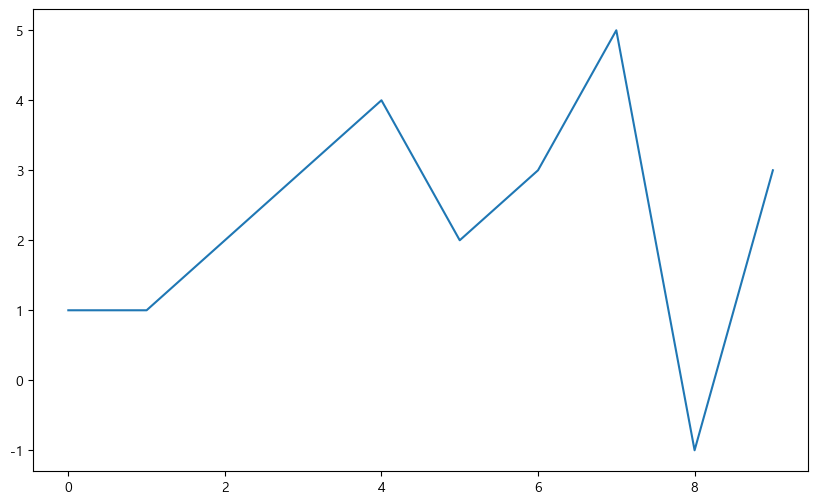

In [515]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1 ,3])
plt.show()

### 예제1 : 그래프 기초

### 삼각함수 그리기
- np.arange(a, b, s) : a부터 b까지 s의 간격
- np.sin(value)

In [516]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

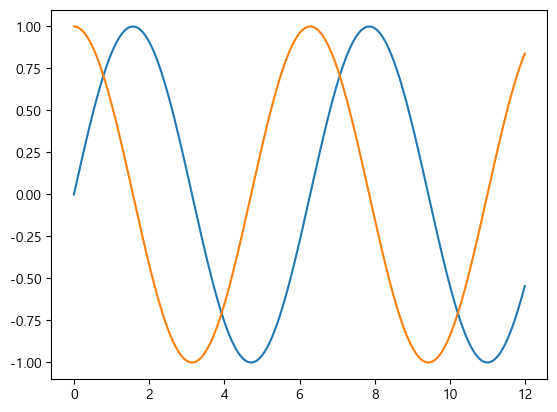

In [517]:
plt.figure(figure=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주항색, 파란색 선 데이터 의미 구분 

In [518]:
def drawGraph():

    plt.figure(figure=(10, 6))
    plt.plot(t, np.sin(t), label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid(True)
    plt.legend(loc="upper right") # 범례
    plt.title("Example of sinwave")
    plt.xlabel("time")
    plt.ylabel("Amplitude") # 진폭
    plt.show()

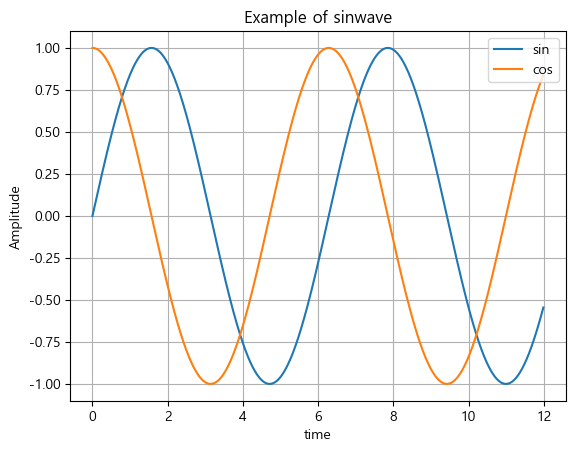

In [519]:
drawGraph()

### 예제2: 그래프 커스텀

In [520]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

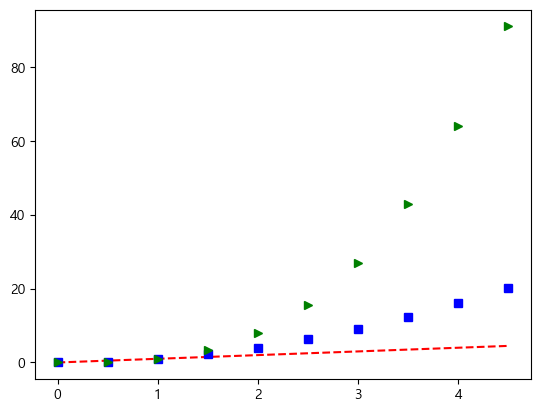

In [521]:
plt.figure(figure=(10, 6))
plt.plot(t, t,"r--") # red ----
plt.plot(t, t ** 2, "bs")
plt.plot(t, t ** 3, "g>")
plt.show()

In [522]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8,9, 5, 3]

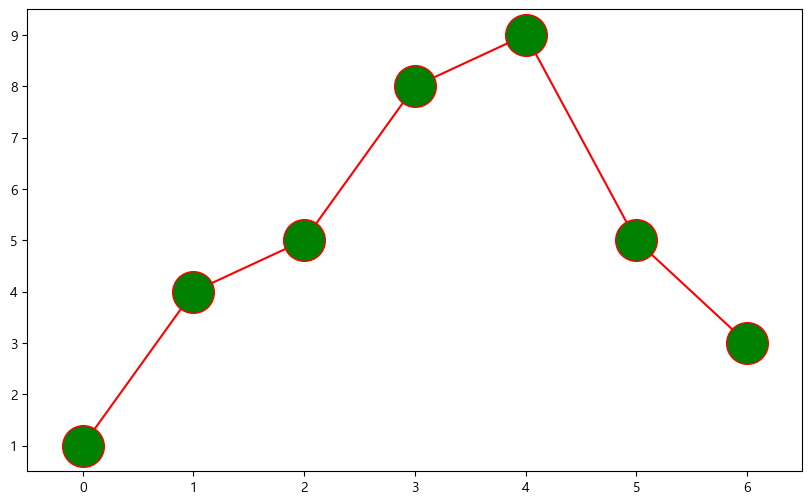

In [523]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        y,
        color="red",
        linestyle="-",
        marker="o",
        markerfacecolor="green",
        markersize=30,
    )
    
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()

drawGraph()

### 예제3 : scatter plot

In [524]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

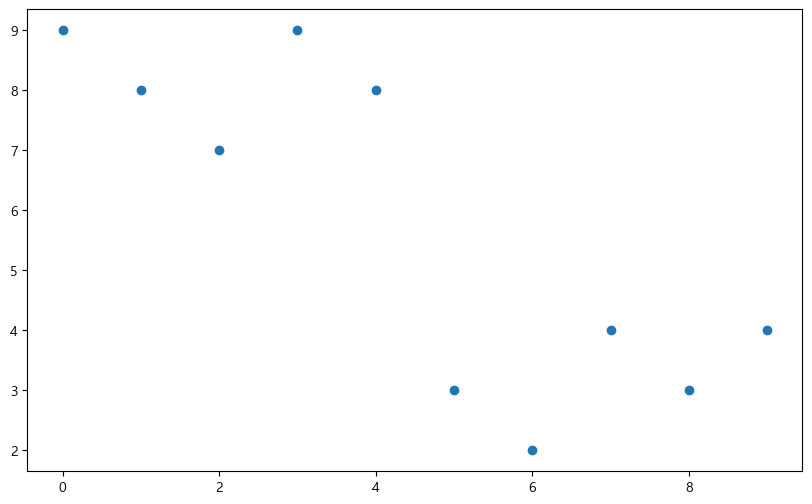

In [525]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()

drawGraph()

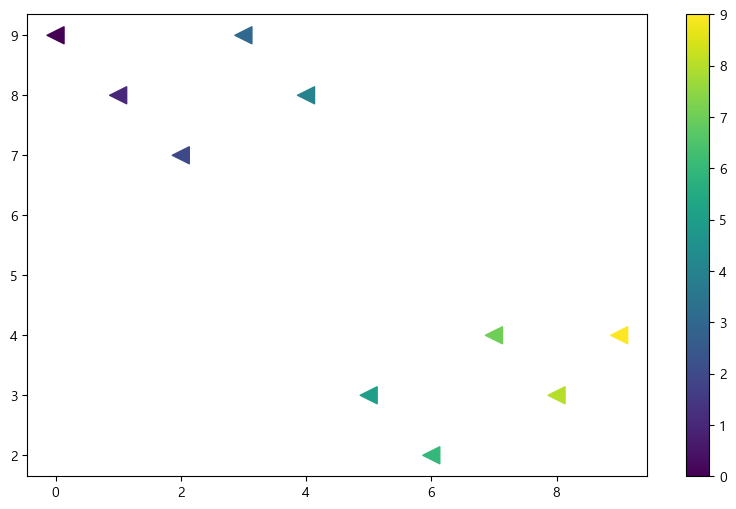

In [526]:
colormap = t

def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s=150, c=colormap, marker="<")
    plt.colorbar()
    plt.show()

drawGraph()

### 예제4: Pandas에서 plot 그리기
- matplotlib을 가져와서 사용

In [527]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309
강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101,0.286303
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767,0.161201
관악구,2109,149.290780,497632,481145,16487,87267,3.313091,17.536453,0.423807


<Axes: xlabel='구별'>

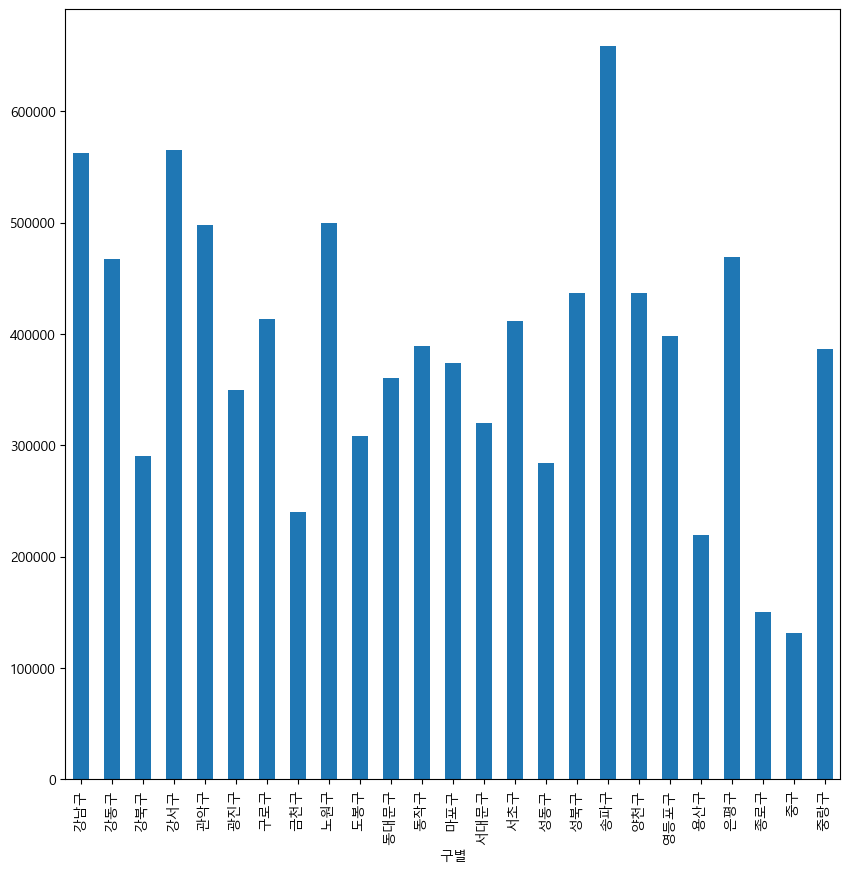

In [528]:
data_result["인구수"].plot(kind="bar", figsize=(10, 10))

<Axes: ylabel='구별'>

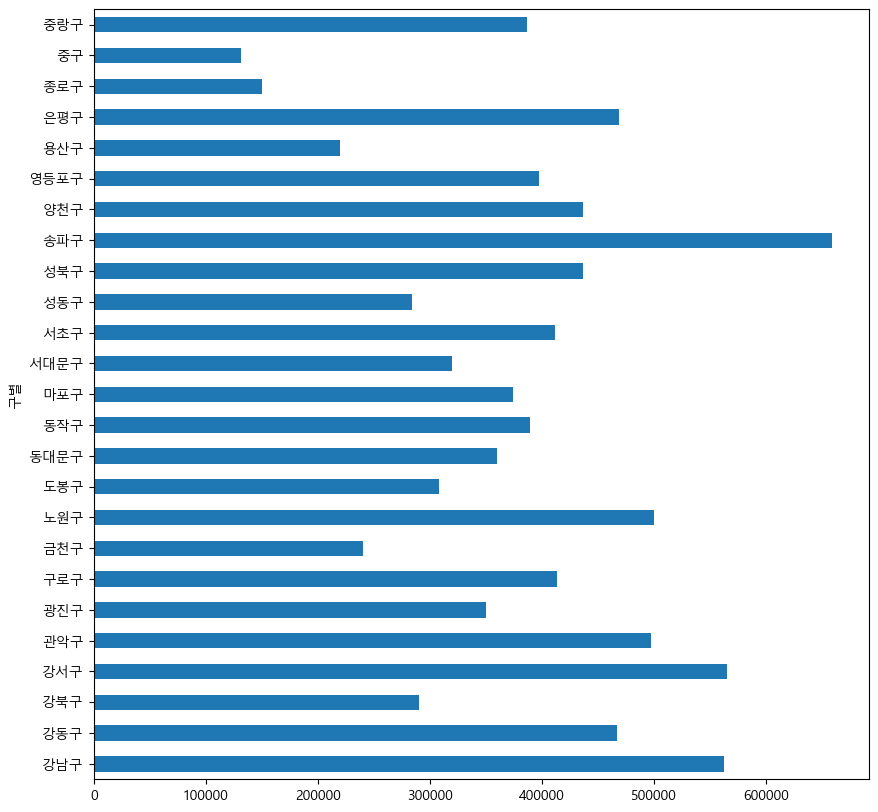

In [529]:
data_result["인구수"].plot(kind="barh", figsize=(10, 10))

In [530]:
import matplotlib.pyplot as plt
# import matplotlib as npl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 때문에 한글이 꺠질 수가 있어서 주는 설정
rc("font", family="Malgun Gothic")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

In [531]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309
강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101,0.286303
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767,0.161201
관악구,2109,149.290780,497632,481145,16487,87267,3.313091,17.536453,0.423807


#### 소개 컬럼 시각화

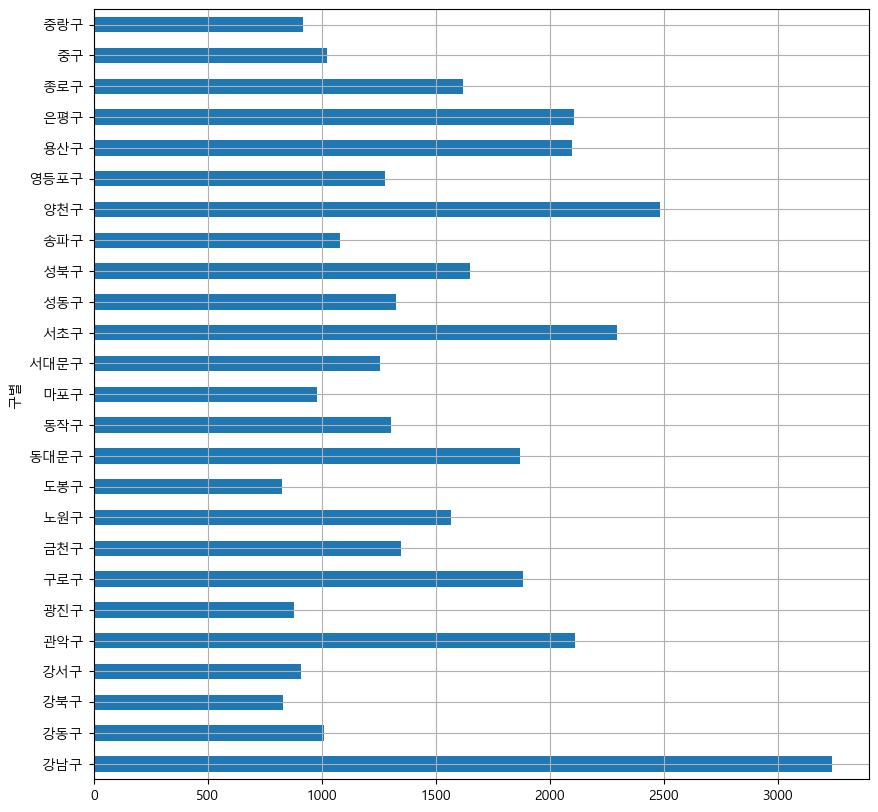

In [532]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10));

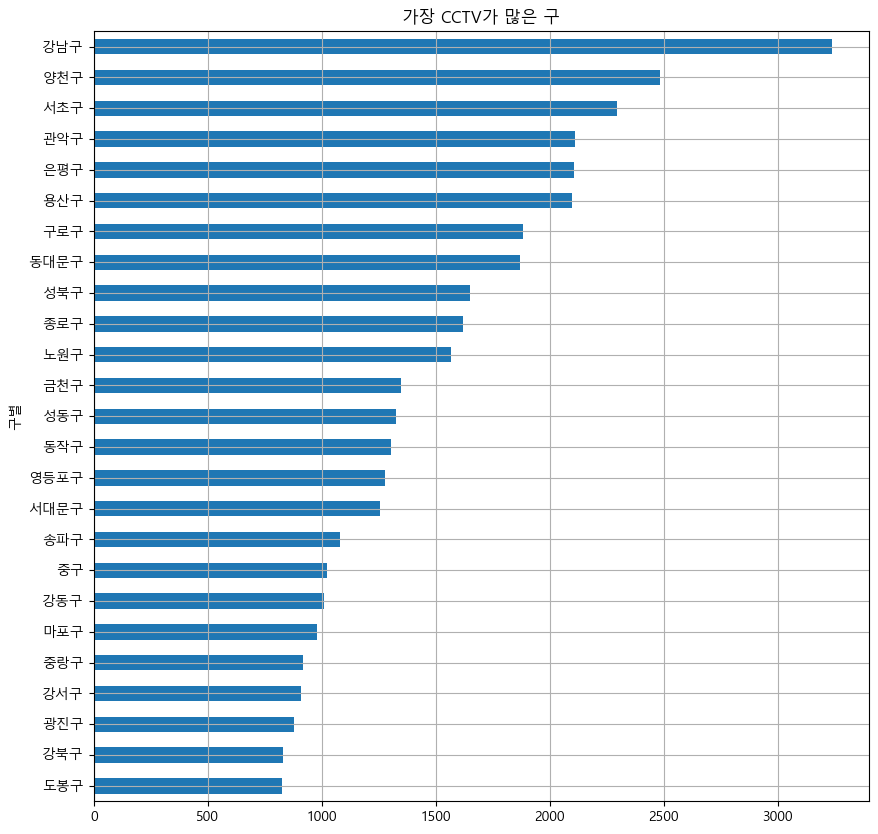

In [533]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10));
drawGraph()    

In [534]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309
강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101,0.286303
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767,0.161201
관악구,2109,149.290780,497632,481145,16487,87267,3.313091,17.536453,0.423807


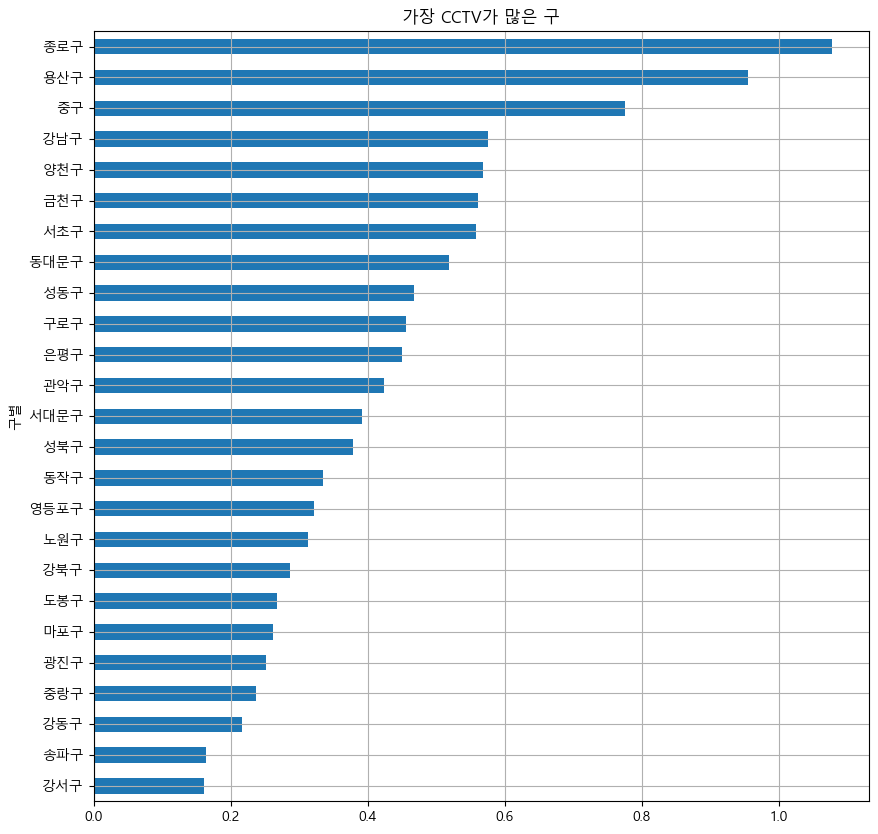

In [535]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10));
drawGraph()    

---

## 6. 데이터 경향 표시

In [536]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309
강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101,0.286303
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767,0.161201
관악구,2109,149.290780,497632,481145,16487,87267,3.313091,17.536453,0.423807


#### 인구수와 소계 컬럼으로 scatter plot 그리기

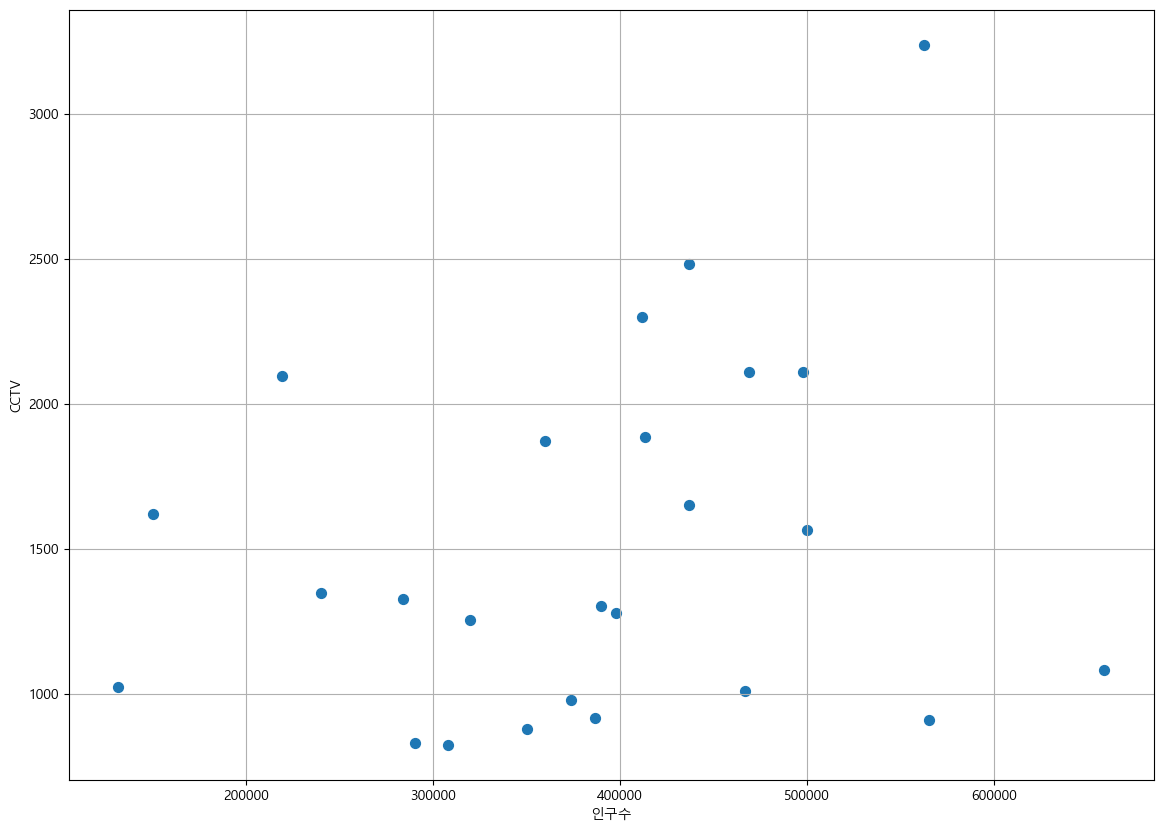

In [537]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()
drawGraph()

#### Numpy를 이용한 1차 직선 만들기
- np.polyfit(): 직선을 구성하기 위한 계수를 계산
- np.poly1d(): polyfit으로 찾은 계수로 python에서 사용할 수 있는 함수로 만들어주는 기능

In [538]:
import numpy as np

In [539]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.15351405e-03, 1.07145421e+03])

In [540]:
f1 = np.poly1d(fp1)
f1

poly1d([1.15351405e-03, 1.07145421e+03])

In [541]:
f1(400000)

1532.8598270967202

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는?

In [542]:
fx = np.linspace(100000, 700000, 100)

- 경향선을 그리기 위한 x 데이터 생성
- np.linspace(a, b, n): a부터 b까지 n개의 동간격 데이터 생성

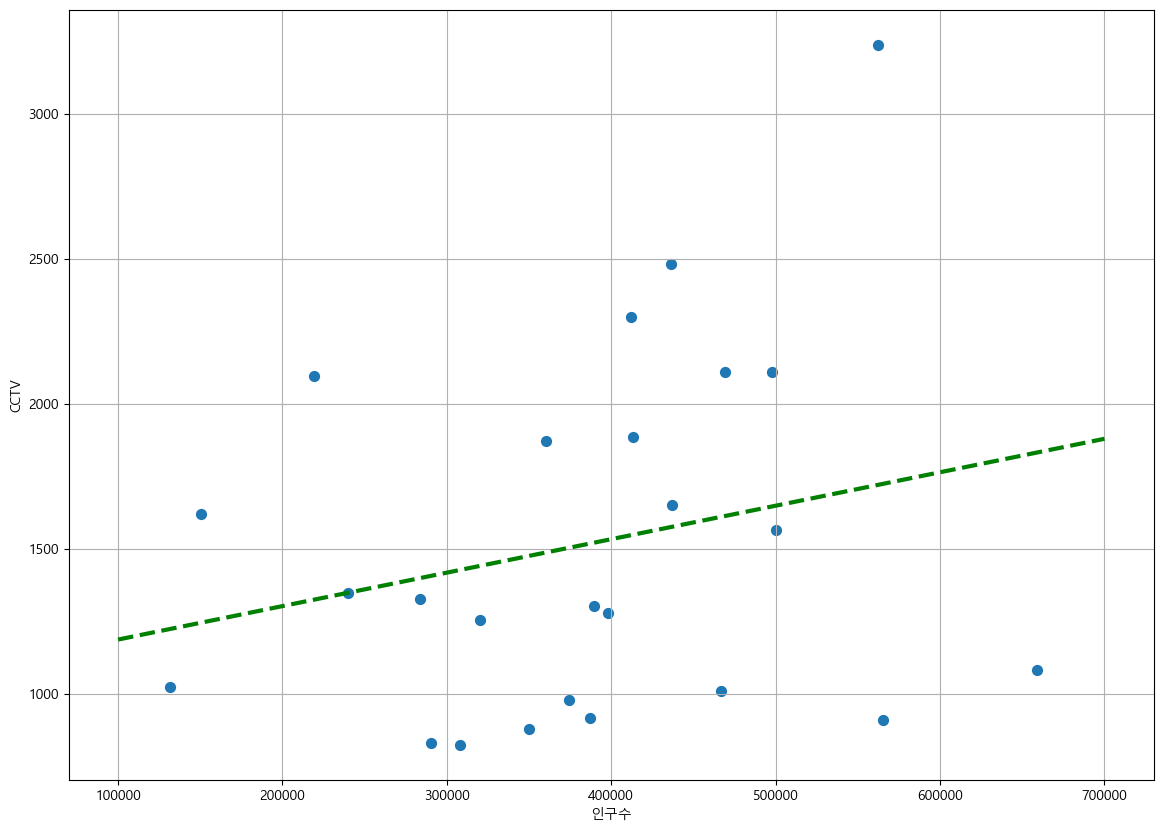

In [543]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()
drawGraph()

---

## 7. 강조하고 싶은 데이터를 시각화 해보자

### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향[trend]과의 오차 만들기
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [544]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [545]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309
강북구,831,125.203252,290252,285054,5198,69922,1.790858,24.090101,0.286303


In [546]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [547]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017,1518.114019


In [548]:
# 경향과 베교해서 데이터의 오차가 너무 나는 데이터 계산

df_sort_f = data_result.sort_values(by="오차", ascending=False) # 내림차순
df_sort_t = data_result.sort_values(by="오차", ascending=True) # 오름차순

In [549]:
# 경향 대비 CCTV를 많이 가진 구

df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,562136,556570,5566,89719,0.990152,15.960373,0.576017,1518.114019
양천구,2482,34.671731,436595,433307,3288,78399,0.753101,17.956917,0.568490,906.927326
용산구,2096,53.216374,219451,206061,13390,39021,6.101590,17.781190,0.955111,771.405981
서초구,2297,63.371266,411959,407404,4555,67191,1.105693,16.310118,0.557580,750.345298
은평구,2108,85.237258,468976,464738,4238,96177,0.903671,20.507872,0.449490,495.575388


In [550]:
# 경향 대비 CCTV를 적게 가진 구

df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,565133,559335,5798,105023,1.025953,18.583767,0.161201,-812.343063
송파구,1081,104.347826,658768,652752,6016,111724,0.913220,16.959537,0.164094,-750.352351
도봉구,825,246.638655,308060,305400,2660,72365,0.863468,23.490554,0.267805,-601.805745
중랑구,916,79.960707,386782,381126,5656,81160,1.462322,20.983396,0.236826,-601.612678
강동구,1010,166.490765,466924,462646,4278,85571,0.916209,18.326537,0.216309,-600.057601


In [552]:
from matplotlib.colors import ListedColormap

# colormap을 사용자 정의(user define)로 설정
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", '#2ecc71', "#3498db", "#3489db"]
my_cmap =ListedColormap(color_step)

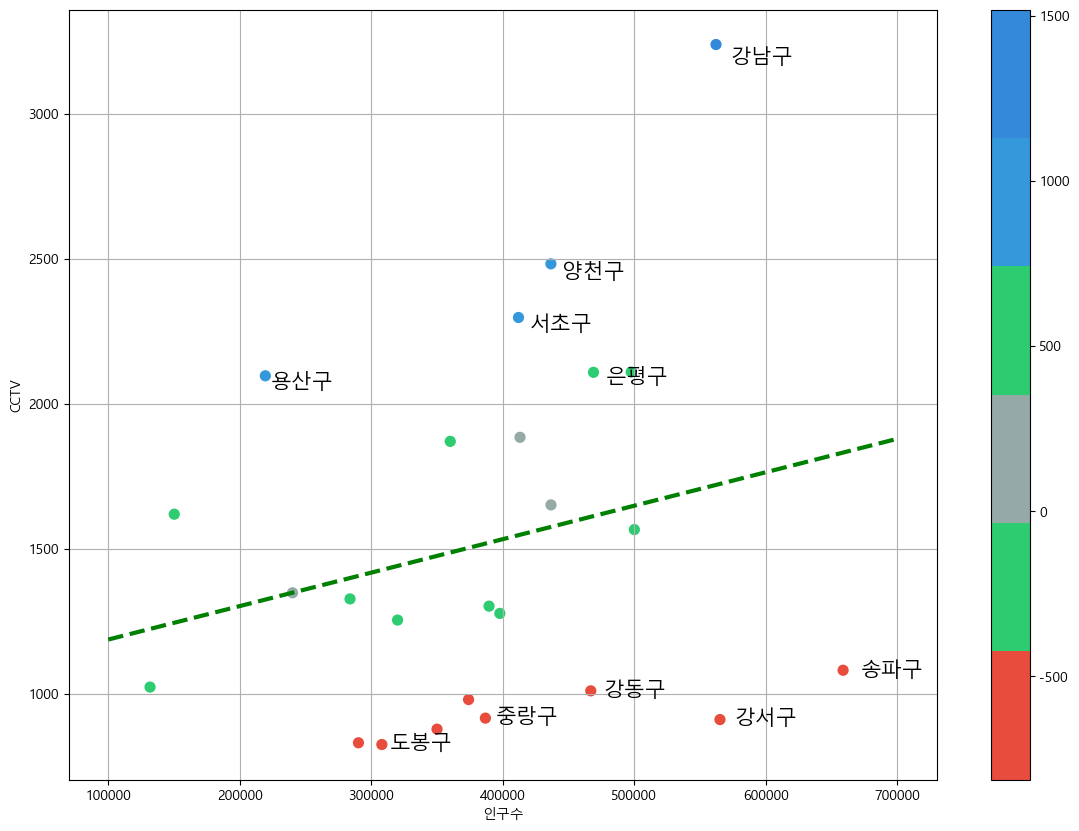

In [574]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")

    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f["인구수"].iloc[n] * 1.02, # x 좌표
            df_sort_f["소계"].iloc[n] * 0.98, # y 좌표
            df_sort_f.index[n], # title
            fontsize=15,
        )
        
        # 하위 5개
        plt.text(
            df_sort_t["인구수"].iloc[n] * 1.02, # x 좌표
            df_sort_t["소계"].iloc[n] * 0.98, # y 좌표
            df_sort_t.index[n], # title
            fontsize=15,
        )
        
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()
drawGraph()

In [576]:
data_result.to_csv("../data/01. CCTV_result.csv", sep=",", encoding="utf-8")